In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler
from PIL import Image, ImageChops
import SimpSOM as sps

In [10]:
np.random.seed(0)
#We load here the data from the provided training set, we randomly select 500 landmark points and separate the labels. 
train = pd.read_csv('./data/kaggle/diabetes2_train.csv')
train = train.sample(n=500, random_state=0)
labels = train['Outcome']
train = train.drop("Outcome",axis=1)
trainSt = StandardScaler().fit_transform(train.values)

In [11]:
#We build a 40x40 network and initialise its weights with PCA 
net = sps.somNet(50, 50, trainSt, PBC=True, PCI=True)

#Now we can train it with 0.1 learning rate for 10000 epochs
net.train(0.1, 10000)



Periodic Boundary Conditions active.
The weights will be initialised with PCA.
Training SOM... done!


In [12]:


net.save('./filename_weights')




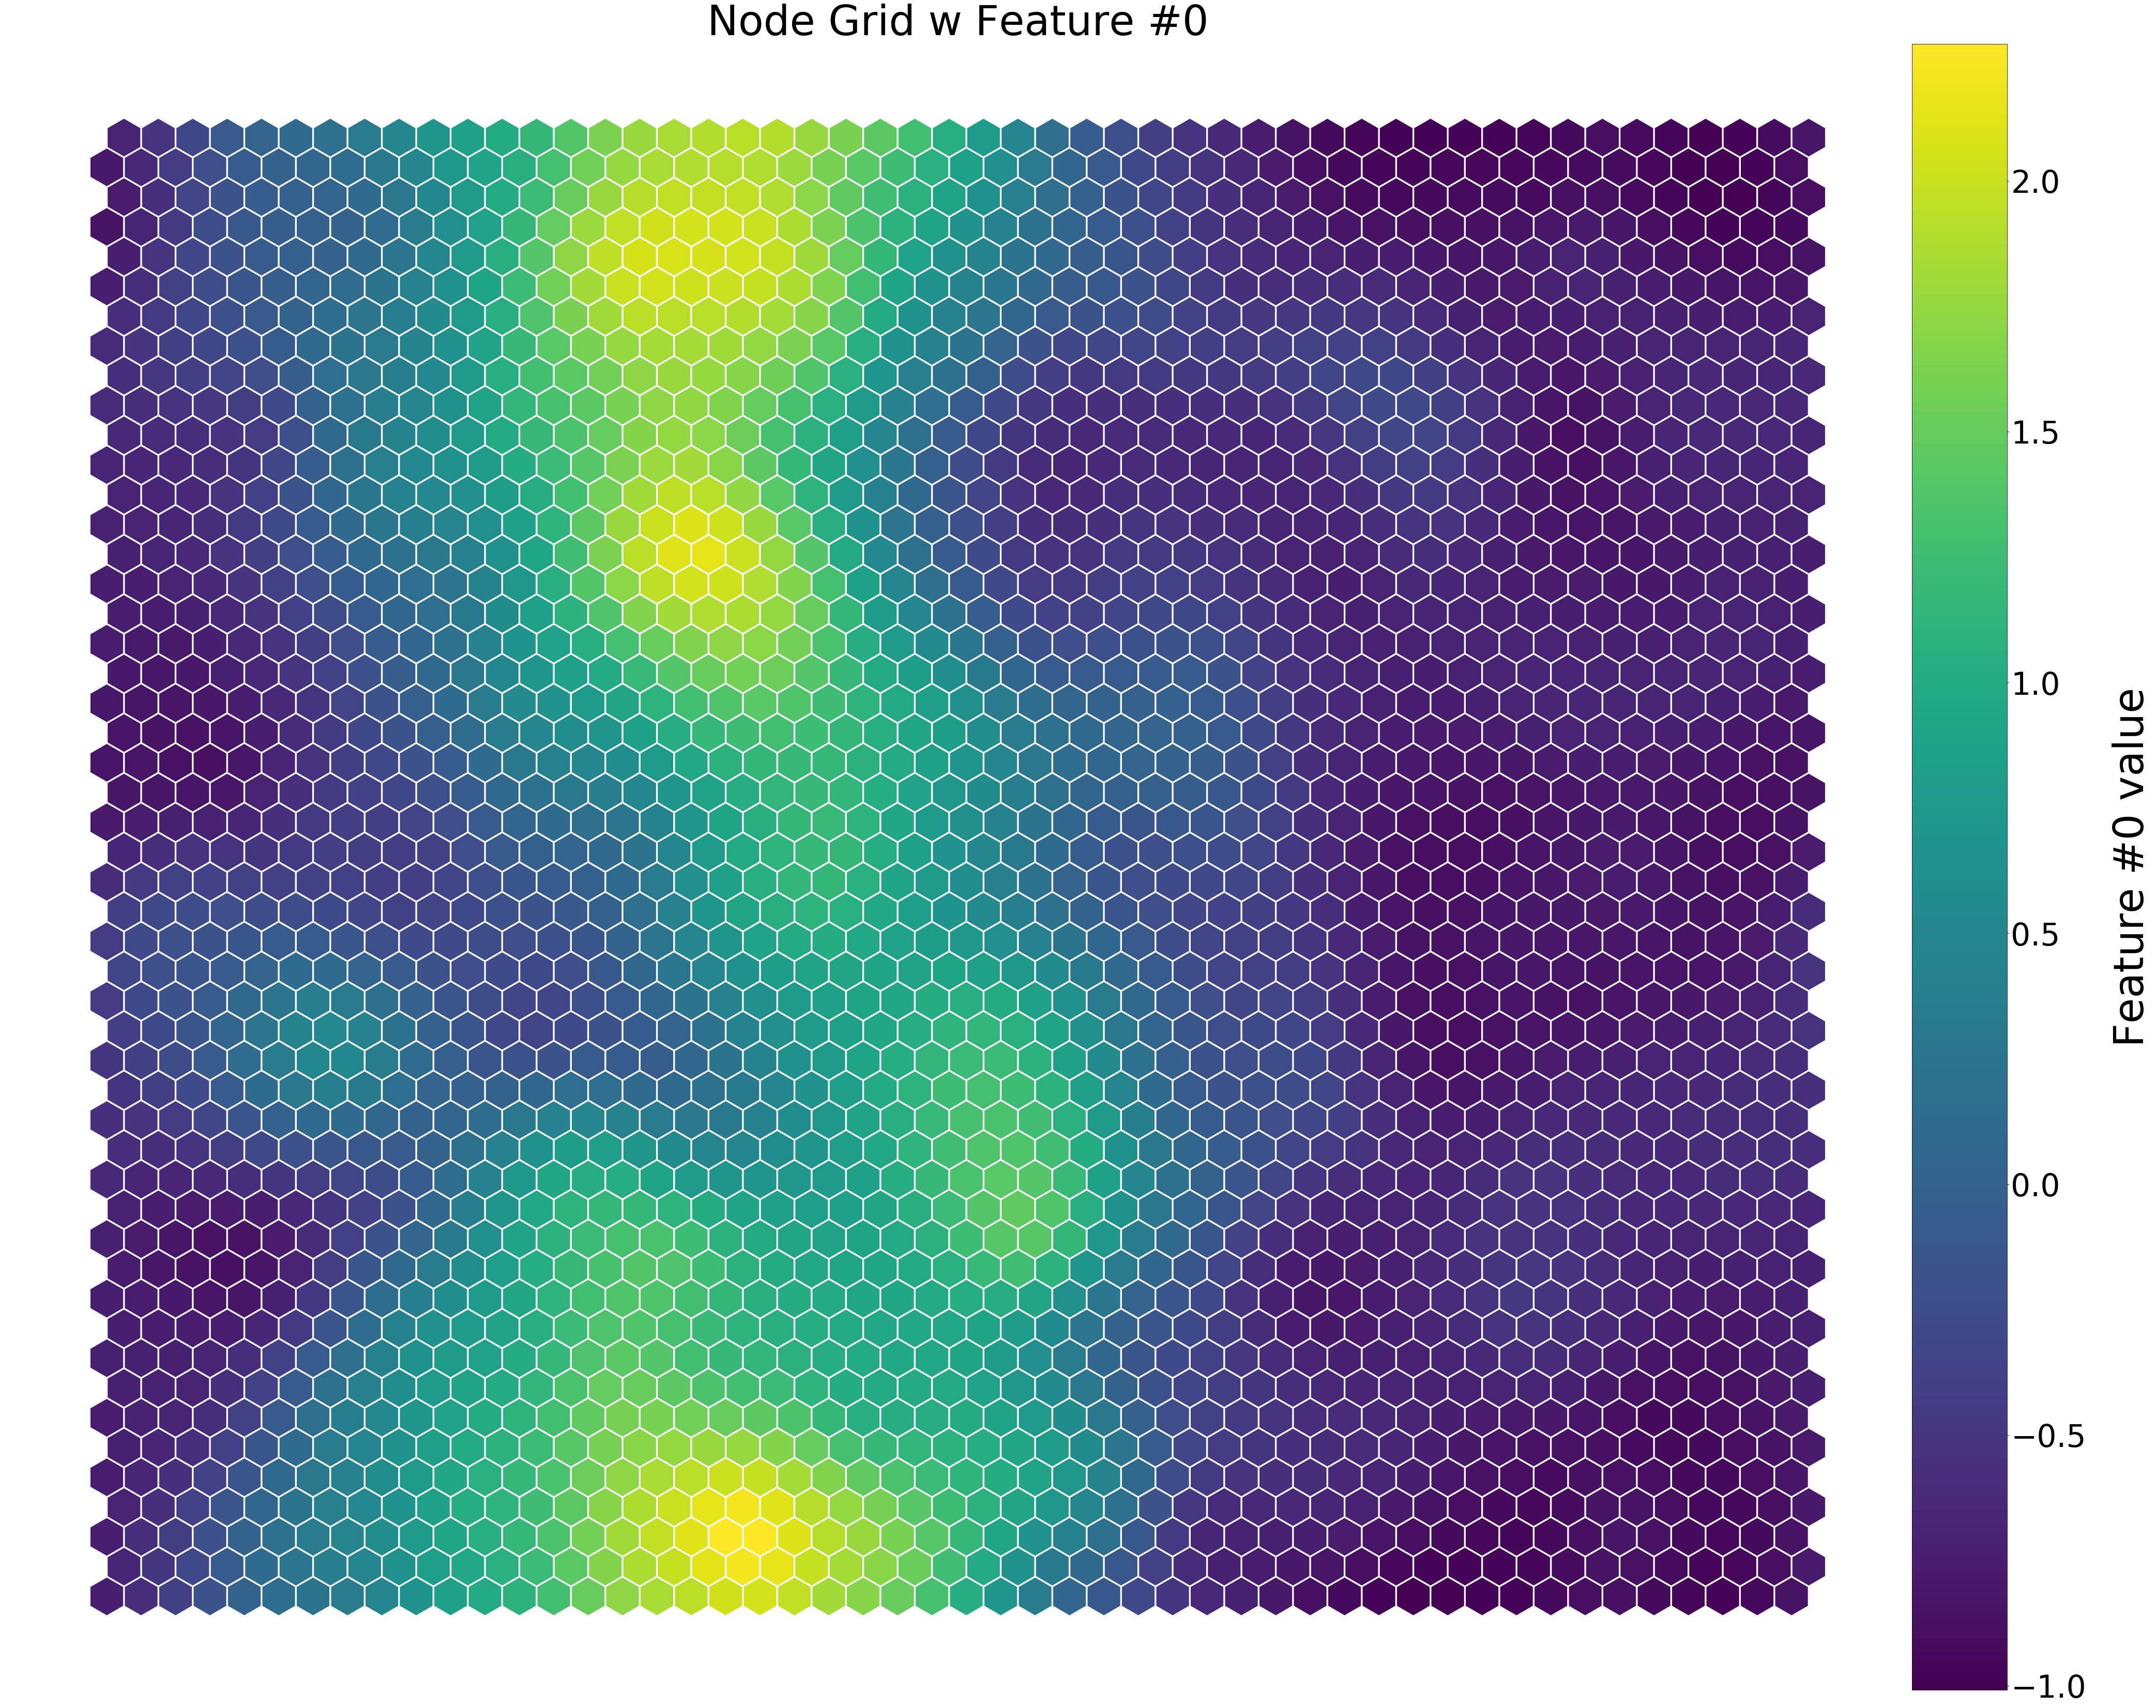

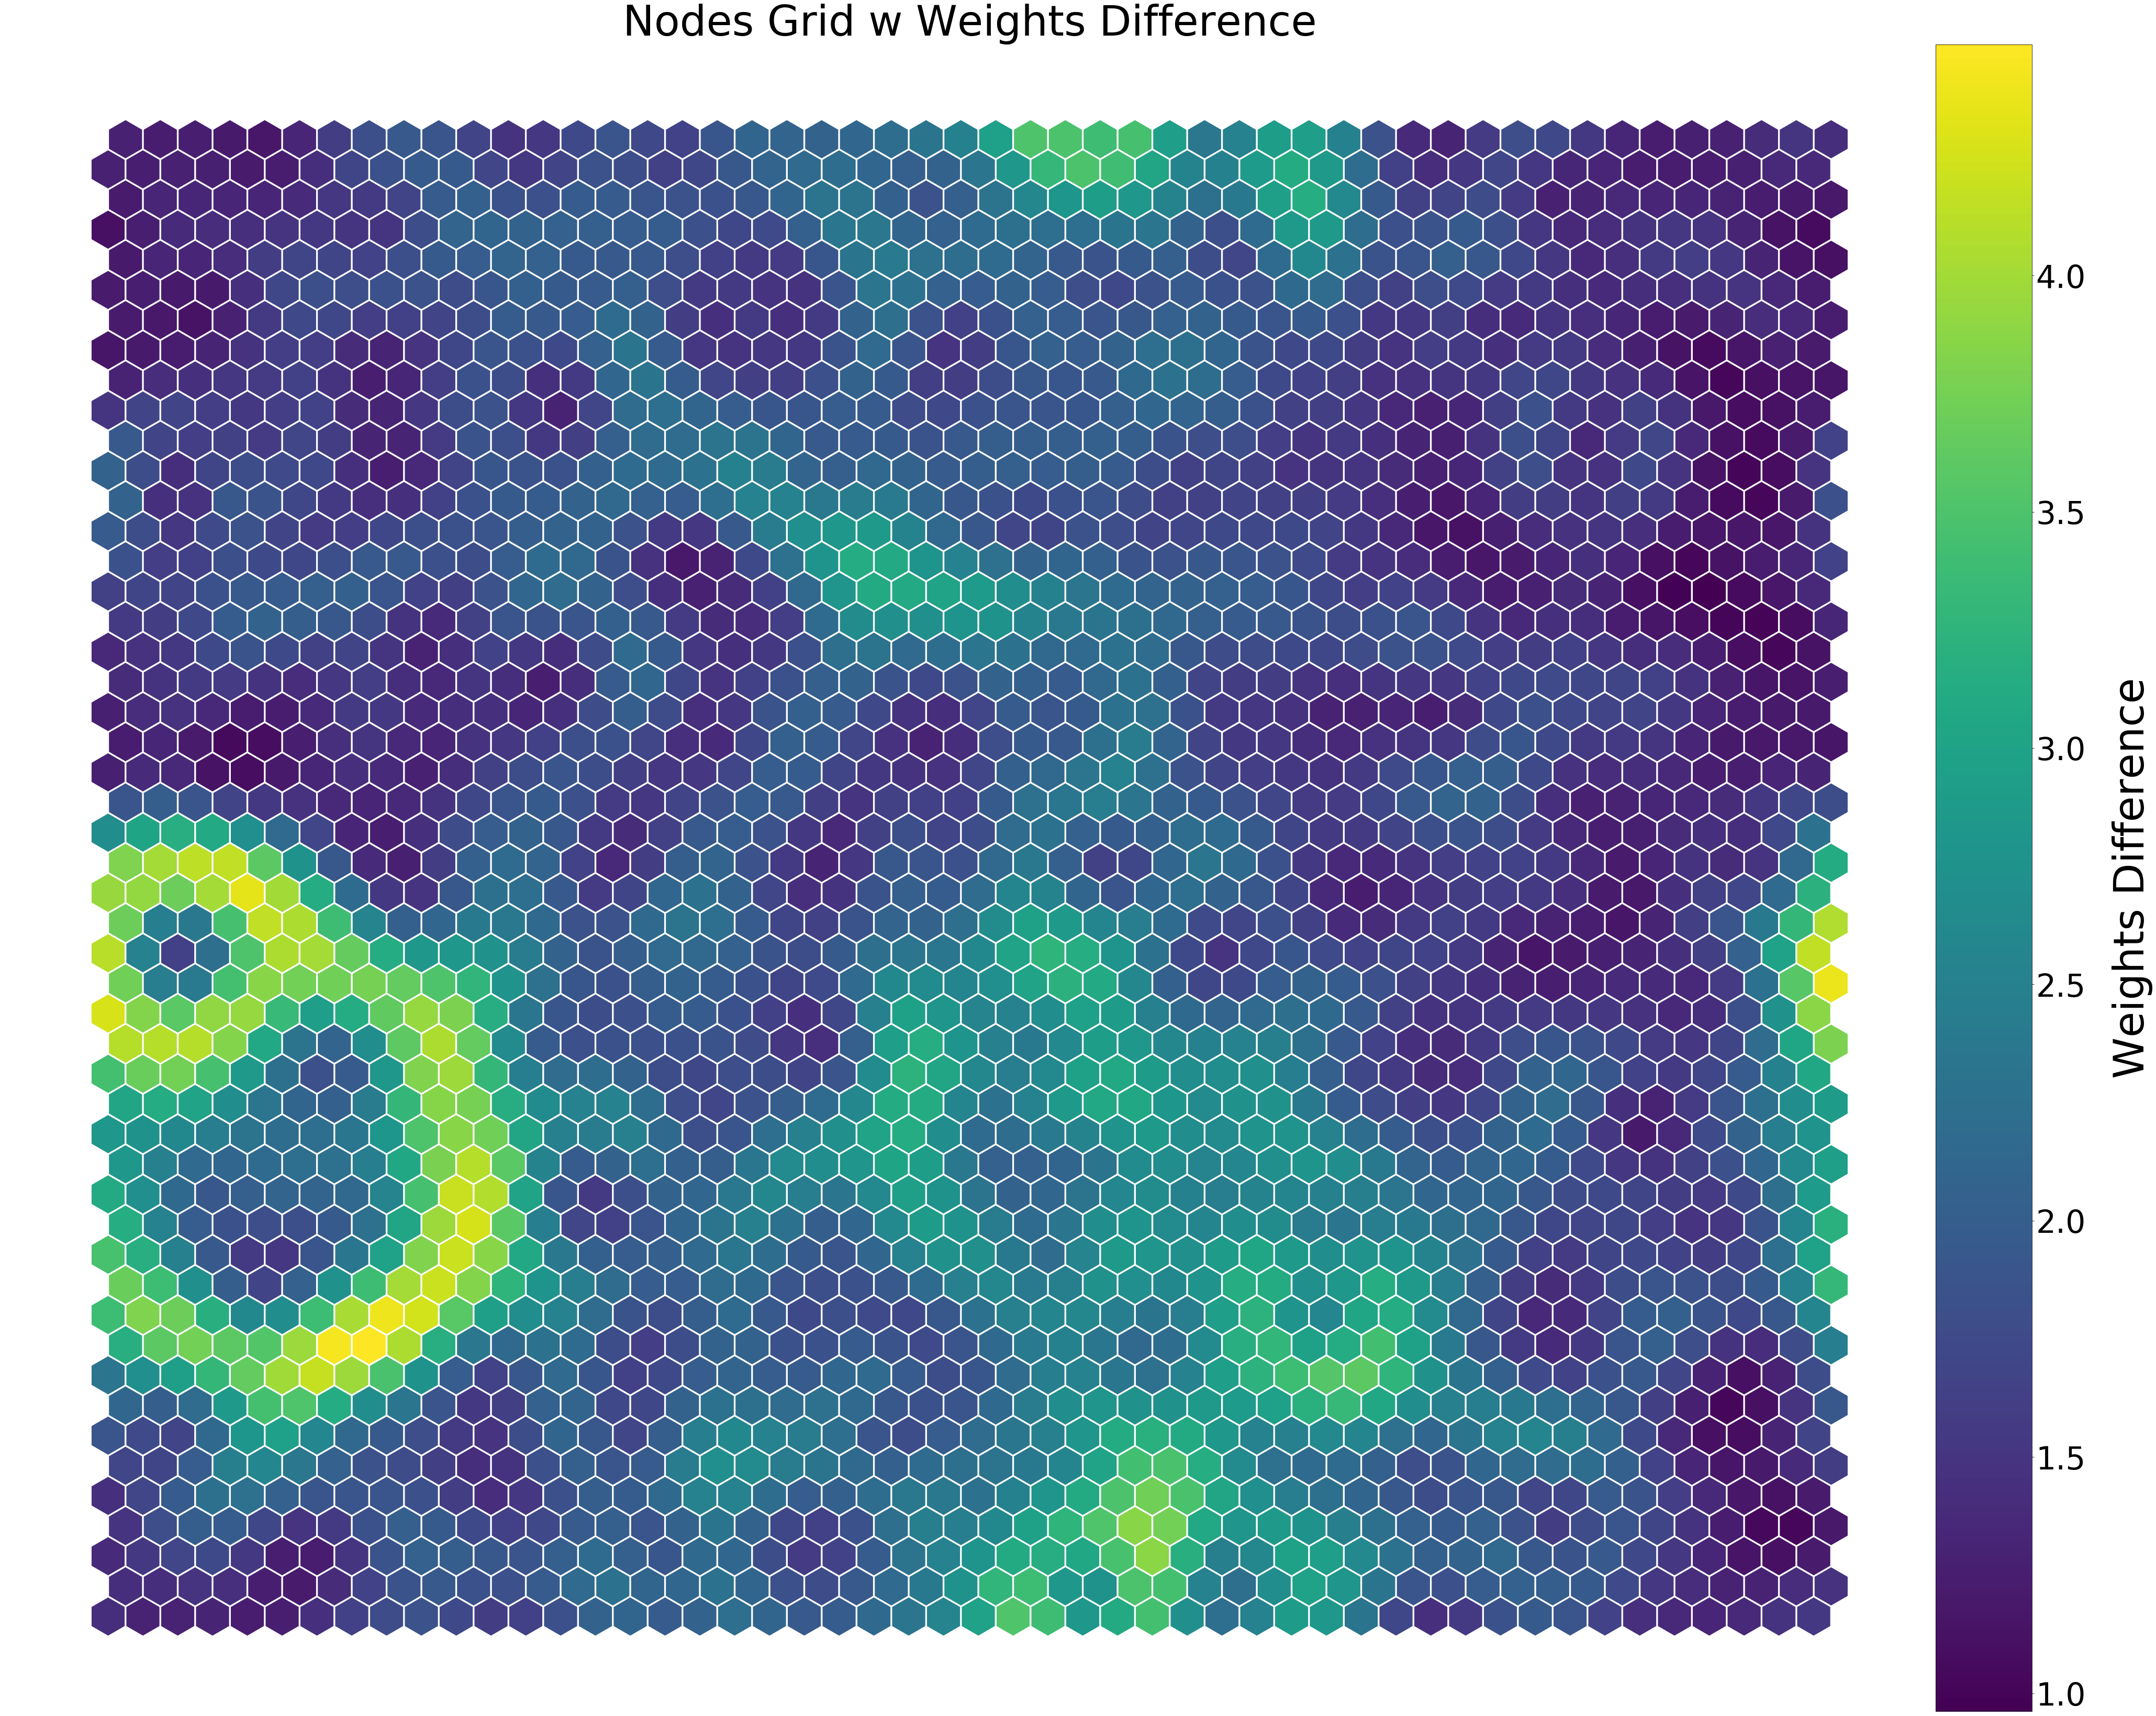

In [13]:
net.nodes_graph(colnum=0)
plt.savefig('./data/SimpSom1.png')
net.diff_graph()
plt.savefig('./data/SimpSom2.png')



In [14]:
net.project(trainSt, labels='Outcome')

[[4, 24.248711305964285],
 [37, 8.660254037844387],
 [21.5, 11.258330249197702],
 [33.5, 4.330127018922194],
 [41.5, 2.598076211353316],
 [44.5, 14.722431864335457],
 [36.5, 38.97114317029974],
 [34, 38.1051177665153],
 [46, 5.196152422706632],
 [45, 17.320508075688775],
 [30, 31.176914536239792],
 [18.5, 14.722431864335457],
 [2, 27.712812921102042],
 [42.5, 14.722431864335457],
 [7.5, 9.526279441628825],
 [14, 25.98076211353316],
 [46.5, 0.8660254037844388],
 [32.5, 38.97114317029974],
 [38, 20.784609690826528],
 [43.5, 28.578838324886476],
 [17, 15.588457268119896],
 [15, 29.444863728670914],
 [32, 39.83716857408418],
 [42, 41.569219381653056],
 [39.5, 37.23909236273086],
 [48, 12.124355652982143],
 [39, 15.588457268119896],
 [33, 12.124355652982143],
 [16, 20.784609690826528],
 [27.5, 16.454482671904337],
 [28, 0.0],
 [31, 17.320508075688775],
 [6, 1.7320508075688776],
 [23.5, 6.062177826491071],
 [13.5, 35.50704155516199],
 [8.5, 40.70319397786862],
 [31, 31.176914536239792],
 [14

<Figure size 432x288 with 0 Axes>

In [15]:
net.cluster(trainSt, type='MeanShift')


[[6,
  7,
  10,
  17,
  19,
  22,
  23,
  24,
  36,
  39,
  48,
  61,
  63,
  64,
  66,
  69,
  74,
  75,
  77,
  83,
  86,
  89,
  90,
  91,
  92,
  99,
  101,
  102,
  107,
  108,
  112,
  116,
  117,
  123,
  125,
  128,
  138,
  146,
  149,
  153,
  156,
  161,
  162,
  167,
  173,
  176,
  177,
  178,
  185,
  190,
  191,
  193,
  194,
  195,
  201,
  206,
  213,
  221,
  224,
  228,
  231,
  237,
  238,
  242,
  243,
  244,
  245,
  249,
  252,
  258,
  262,
  264,
  269,
  275,
  276,
  283,
  285,
  286,
  287,
  299,
  300,
  306,
  307,
  318,
  320,
  328,
  333,
  338,
  346,
  351,
  356,
  365,
  367,
  368,
  374,
  376,
  380,
  381,
  387,
  392,
  393,
  396,
  401,
  404,
  405,
  408,
  409,
  411,
  422,
  426,
  427,
  428,
  441,
  448,
  455,
  457,
  460,
  466,
  469,
  479,
  482,
  483,
  485,
  486,
  490,
  491,
  498],
 [0,
  11,
  12,
  14,
  15,
  20,
  21,
  28,
  32,
  34,
  35,
  37,
  38,
  40,
  41,
  42,
  43,
  46,
  47,
  51,
  52,
  55,
  58,
 

<Figure size 432x288 with 0 Axes>

In [16]:
import pickle

# saving the some in the file som.p
with open('net.p', 'wb') as outfile:
    pickle.dump(net, outfile)





In [17]:
with open('net.p', 'rb') as infile:
    som = pickle.load(infile)




In [18]:
#Here we first define a few useful functions
def autocrop(fileName):
    im = Image.open(fileName)
    im=im.crop((0,100,2900,im.size[1]))
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

def posMap(x,y):
     if y%2==0:
        return [y, x*2/np.sqrt(3)*3/4]
     else:
        return [y+0.5, x*2/np.sqrt(3)*3/4]
    
def posCount(x,y):
     return y*40+x

def posCountR(x):
     return [np.int(x%40),np.int(x/40)]



Node's position: 0 20
Node's position: 6 1
Node's position: 11 23
Node's position: 31 18
Node's position: 33 7
Node's position: 37 13


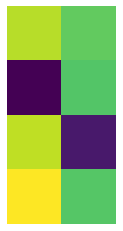

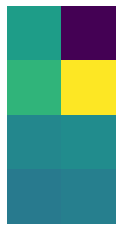

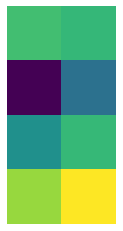

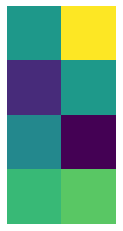

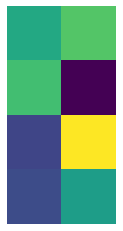

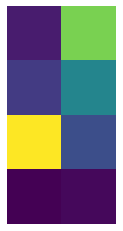

In [19]:
#Let's print a few trained nodes' weights and see how good they are
listNodes=[[20,0],[23,11],[1,6],[13,37],[7,33],[18,31]]
listCount=[posCount(20,0), posCount(23,11), posCount(1,6), posCount(13,37), posCount(7,33), posCount(18,31)]

i=0
for node in net.nodeList:
    if i in listCount:
        print('Node\'s position: {:d} {:d}'.format(posCountR(i)[1], posCountR(i)[0]) )
        plt.imshow(np.asarray(node.weights).reshape(4,2))
        plt.axis('off')
        plt.savefig('./data/Nodes'+str(i)+'.png')
        plt.show()
    i+=1



In [20]:
projData=net.project(trainSt[:50])




<Figure size 432x288 with 0 Axes>

In [21]:
#We first save a cropped version of the original map to superimpose and then we add the scatterpoints
cropped = autocrop('./nodesDifference.png')
cropped.save('./cropped.png')